# CSE 4038 - Computer Vision in Health Care Lab
### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 6&7: Support Vector Machine

# iii) SVM Classifier - Image Dataset: Facial Expression (Multiclass Classification)
### Use any face expression dataset. Demonstrate Multiclass classification using SVM. Guage the performance of your SVM classification. 

## a) Using SVC Classifier

## Import the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

## Define data directories

In [2]:
DATADIR = 'C:/Users/V Padmaja/Downloads/Facial_Expression/train/'
CATEGORIES = ['angry', 'fear', 'happy', 'neutral', 'sad']
IMG_SIZE=100

## Visualizing image from dataset

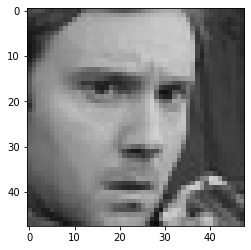

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

## Preprocessing data

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [5]:
print(len(training_data))

1792


In [6]:
lenofimage = len(training_data)

## Converting images to numpy array

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [8]:
X.shape

(1792, 30000)

In [9]:
X = X/255.0

In [10]:
X[1]

array([0.59607843, 0.59607843, 0.59607843, ..., 0.71764706, 0.71764706,
       0.71764706])

In [11]:
y=np.array(y)

In [12]:
y.shape

(1792,)

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## SVM Classifier

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

## Prediction and Evaluation

In [15]:
y2 = svc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy on data is",accuracy_score(y_test,y2))

Accuracy on data is 0.31919642857142855


In [17]:
from sklearn.metrics import classification_report
print("Accuracy on report",classification_report(y_test,y2))

Accuracy on report               precision    recall  f1-score   support

           0       0.24      0.29      0.26        55
           1       0.37      0.39      0.38       142
           2       0.42      0.45      0.43       101
           3       0.27      0.26      0.26        77
           4       0.14      0.10      0.11        73

    accuracy                           0.32       448
   macro avg       0.29      0.30      0.29       448
weighted avg       0.31      0.32      0.31       448



### Conclusion: After training using SVC Classifier the model gives an accuracy of 32%. More training data can help us improve the accuracy of the model

## b) Using Sequential Model

## Import Necessary Libraries

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

## Data Augmentation

In [21]:
train_dir = "C:/Users/V Padmaja/Downloads/Facial_Expression/train"
test_dir = "C:/Users/V Padmaja/Downloads/Facial_Expression/test"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "sparse")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "sparse")

Found 1792 images belonging to 5 classes.
Found 386 images belonging to 5 classes.


## Sequential Model

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))

#### To convert the above model into SVM we use a parameter called  “kernel_regularizer” and inside this regularizer, we have to use l1 or l2 norm. Here, I have used using l2 norm and pass linear as activation function.

## Model Compilation

In [26]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])

## Model Training

In [27]:
history = model.fit(x = training_set, validation_data = test_set, epochs=20)

Epoch 1/20
56/56 [==============================] - 10s 162ms/step - loss: 0.2553 - accuracy: 0.2042 - val_loss: 0.2323 - val_accuracy: 0.2902
Epoch 2/20
56/56 [==============================] - 8s 147ms/step - loss: 0.1876 - accuracy: 0.2282 - val_loss: 0.2039 - val_accuracy: 0.2902
Epoch 3/20
56/56 [==============================] - 8s 145ms/step - loss: 0.1650 - accuracy: 0.2282 - val_loss: 0.1867 - val_accuracy: 0.2902
Epoch 4/20
56/56 [==============================] - 8s 147ms/step - loss: 0.1518 - accuracy: 0.2282 - val_loss: 0.1769 - val_accuracy: 0.2902
Epoch 5/20
56/56 [==============================] - 9s 153ms/step - loss: 0.1444 - accuracy: 0.2282 - val_loss: 0.1716 - val_accuracy: 0.2902
Epoch 6/20
56/56 [==============================] - 9s 152ms/step - loss: 0.1405 - accuracy: 0.2148 - val_loss: 0.1688 - val_accuracy: 0.1399
Epoch 7/20
56/56 [==============================] - 8s 150ms/step - loss: 0.1385 - accuracy: 0.1529 - val_loss: 0.1676 - val_accuracy: 0.1658
Epoch

### After training with Facial Expression dataset with CNN it gives us an accuracy of 20.98%

## Evaluation Graph

In [28]:
import matplotlib.pyplot as plt

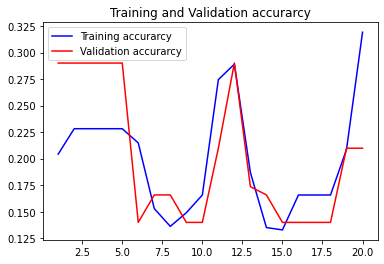

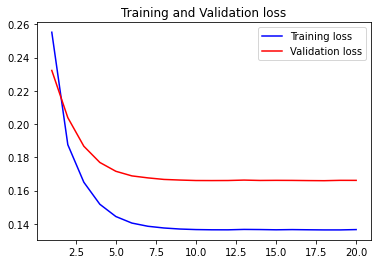

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### The training vs validation accuracy graph is noisy. The model is underfitted and more training data can help us improve the accuracy 

### Conclusion: The SVC Classifier gave us a better accuracy of 32% compared to SVM using CNN which yeilded an accuracy of 20.98%